# Benchmark for bone marrow data using [scIB](https://github.com/theislab/scib/tree/main)

In [1]:
# Load packages
import numpy as np
import pandas as pd
import scanpy as sc
import scib
import warnings
from benchmarks.benchmark_on_testdata import benchmark as benchmark

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=PendingDeprecationWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tensorflow\python\framework\dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


In [2]:
data_path = '../../data/processed/data_to_assess_generalisability/bone_marrow_human/Assess_generalisability_bone_marrow.h5ad'
benchmark_env = benchmark(data_path=data_path, 
                          batch_key="patientID", 
                          HVG=True, 
                          HVGs=4000, 
                          num_patients_for_testing=4,
                          num_patients_for_training=16,
                          Scaled=False, 
                          seed=42)

### Unintegrated

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep Unscaled
Compute neighbors on rep Unscaled
Compute neighbors on rep Unscaled
Compute neighbors on rep Unscaled
Compute neighbors on rep Unscaled
Compute neighbors on rep Unscaled
Compute neighbors on rep Unscaled
Isolated labels ASW...
Graph connectivity...


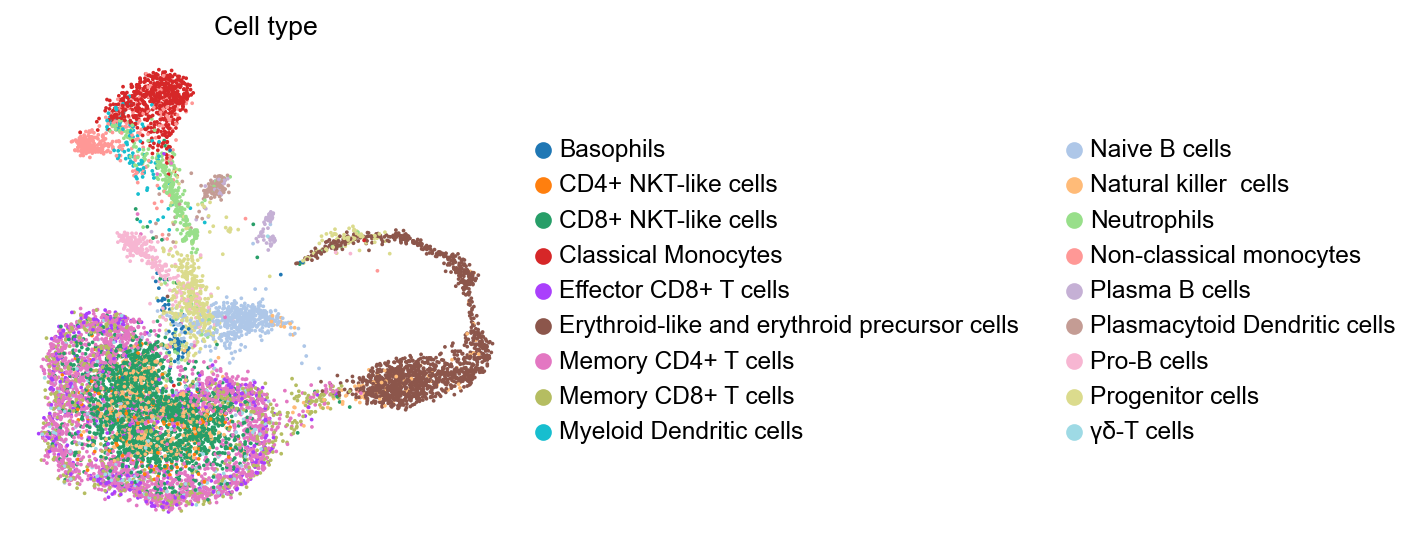

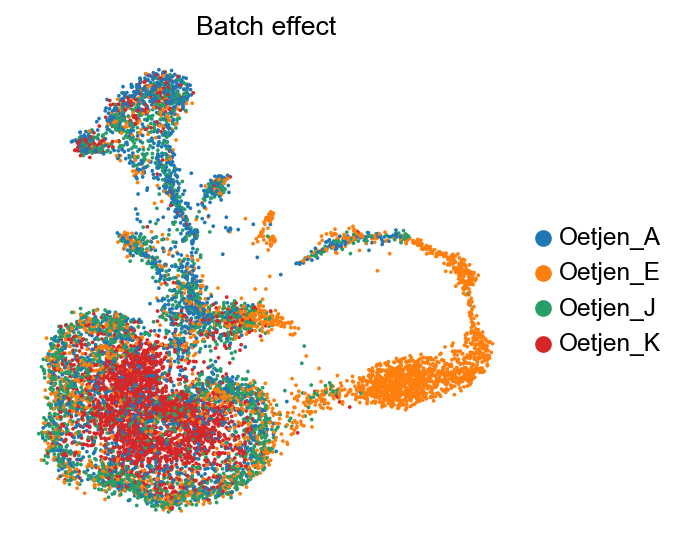

In [3]:
benchmark_env.unintegrated(save_figure=True)

### PCA

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\scib\metrics\metrics.py:293: DeprecationWarning: Call to deprecated function (or staticmethod) opt_louvain.
  res_max, nmi_max, nmi_all = opt_louvain(


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep PCA
Compute neighbors on rep PCA
Compute neighbors on rep PCA
Compute neighbors on rep PCA
Compute neighbors on rep PCA
Compute neighbors on rep PCA
Compute neighbors on rep PCA
Isolated labels ASW...
Graph connectivity...


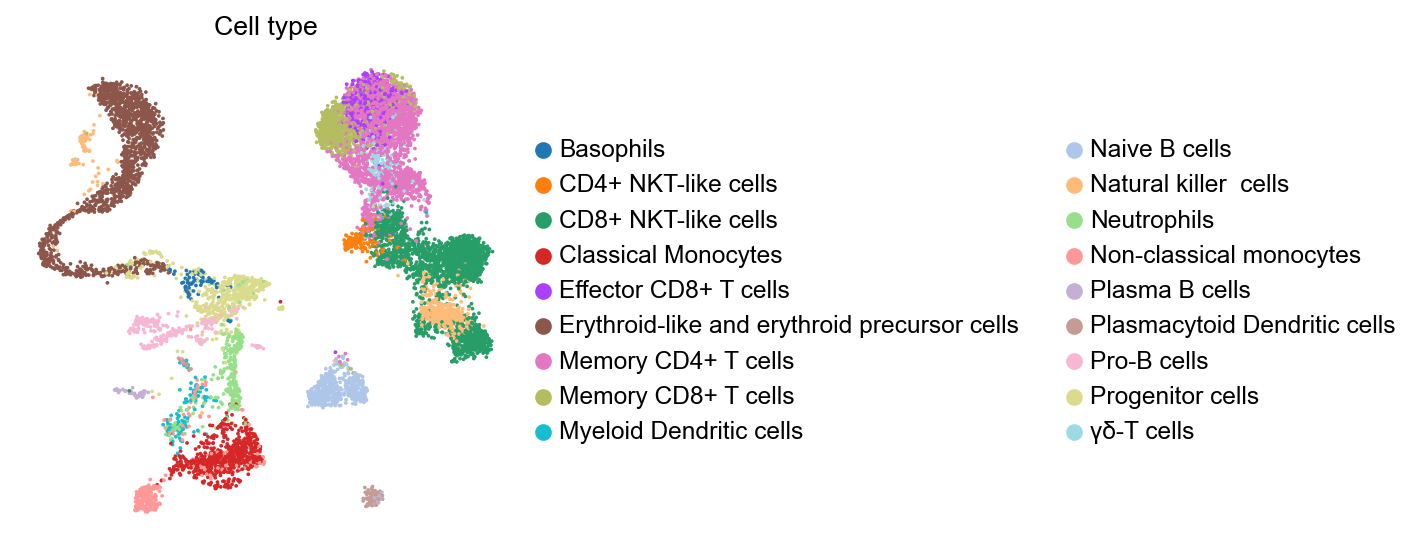

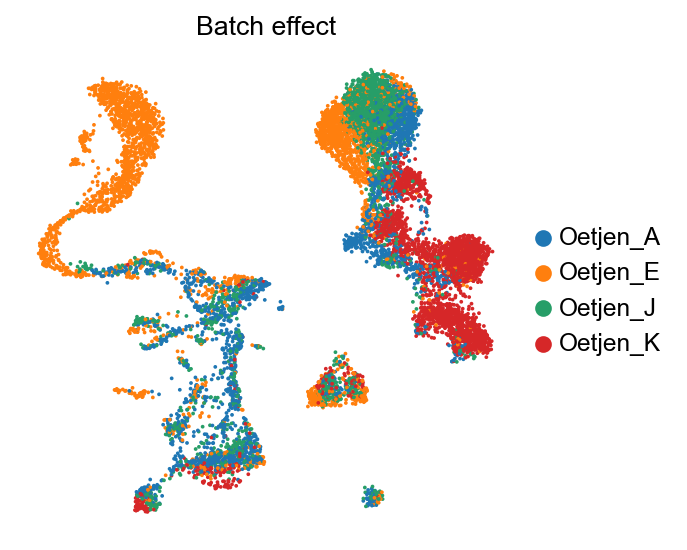

In [4]:
benchmark_env.pca(save_figure=True)

### scVI

In [3]:
vae = benchmark_env.scvi(save_figure=True)

c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\einops\_torch_specific.py:108: ImportWarning: allow_ops_in_compiled_graph failed to import torch: ensure pytorch >=2.0
  warnings.warn("allow_ops_in_compiled_graph failed to import torch: ensure pytorch >=2.0", ImportWarning)
c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [08:42<00:00,  1.31s/it, v_num=1, train_loss_step=1.32e+3, train_loss_epoch=1.3e+3] 

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [08:42<00:00,  1.31s/it, v_num=1, train_loss_step=1.32e+3, train_loss_epoch=1.3e+3]
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             


ValueError: Category Oetjen_A not found in source registry. Cannot transfer setup without `extend_categories = True`.

### scANVI

In [ ]:
benchmark_env.scanvi(vae=vae, save_figure=True)

### scGen

In [4]:
#benchmark_env.scgen(save_figure=True)

### In-house model

#### Model using just a Encoder on HVGs

Number of parameters: 10117100


c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\einops\_torch_specific.py:108: ImportWarning: allow_ops_in_compiled_graph failed to import torch: ensure pytorch >=2.0
  warnings.warn("allow_ops_in_compiled_graph failed to import torch: ensure pytorch >=2.0", ImportWarning)



Start Training



  5%|▌         | 1/20 [03:00<57:16, 180.86s/it]

Epoch 1 | Training loss: 0.1799 | Validation loss: 0.1811


 25%|██▌       | 5/20 [11:19<35:31, 142.13s/it]

Epoch 5 | Training loss: 0.0388 | Validation loss: 0.0268


 45%|████▌     | 9/20 [20:03<26:38, 145.30s/it]

Epoch 9 | Training loss: 0.0141 | Validation loss: 0.0119


 65%|██████▌   | 13/20 [28:53<16:33, 141.86s/it]

Epoch 13 | Training loss: 0.0105 | Validation loss: 0.0099


 85%|████████▌ | 17/20 [37:19<06:52, 137.66s/it]

Epoch 17 | Training loss: 0.0098 | Validation loss: 0.0109


100%|██████████| 20/20 [43:39<00:00, 130.99s/it]

Epoch 20 | Training loss: 0.0268 | Validation loss: 0.0212

**Finished training**

Training time: 43.66 minutes

Loss score: 0.0099

Total training time: 43.70 minutes



c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Isolated labels ASW...
Graph connectivity...


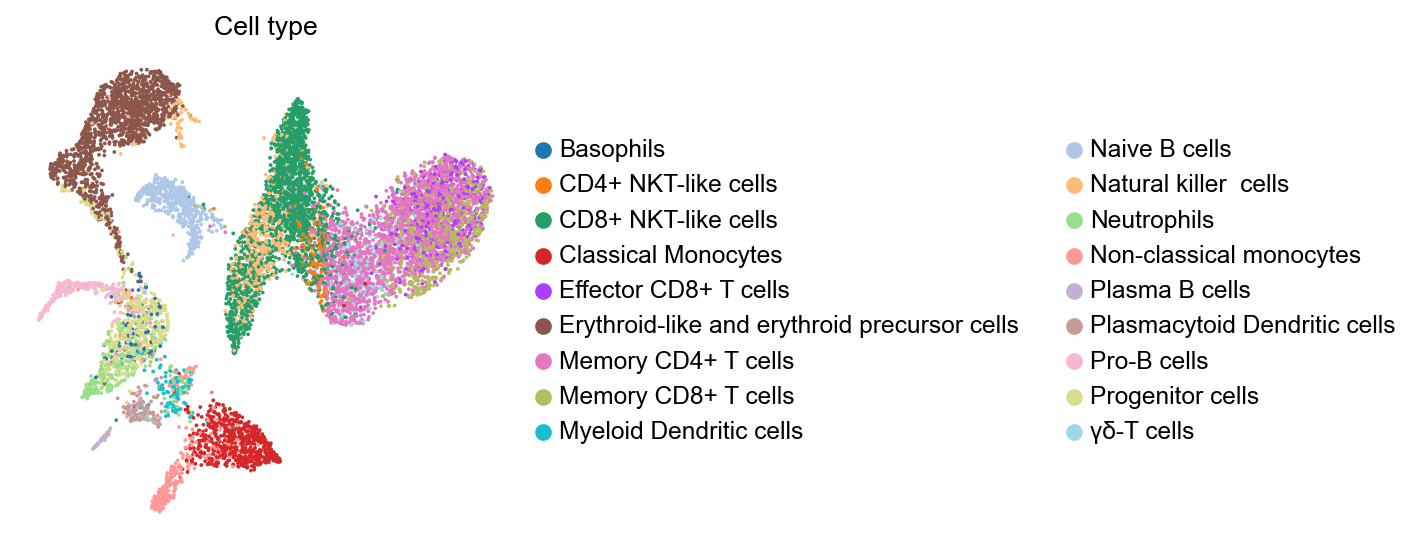

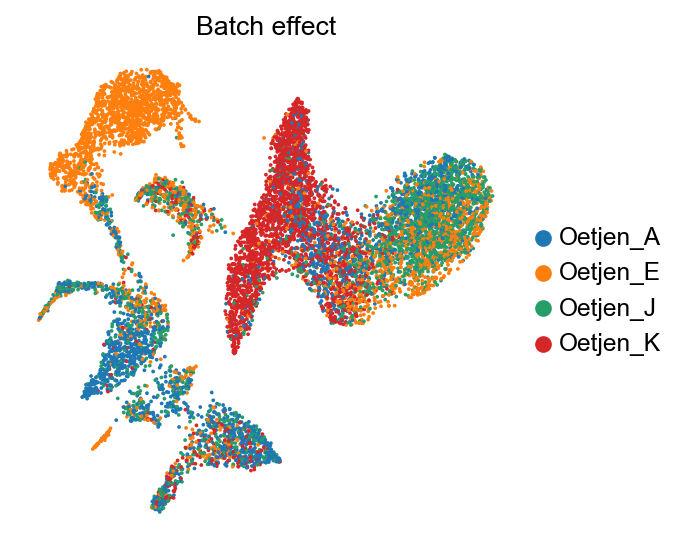

In [3]:
benchmark_env.in_house_model_encoder(save_path='trained_models/Assess_generalisability/Encoder/', train=True, save_figure=True)

#### Transformer model using pathway mask on HVGs

In [2]:
benchmark_env.in_house_model_pathways(save_path='trained_models/Assess_generalisability/Pathways/', train=True, save_figure=True)

#### Model using Encoder directly on HVGs + Transformer on pathway mask applied to HVGs

In [3]:
benchmark_env.in_house_model_encoder_pathways(save_path='trained_models/Assess_generalisability/Encoder_with_Pathways/', train=True, save_figure=True)

#### Model implementing a transformer mechanism on HVGs

In [4]:
benchmark_env.in_house_model_transformer_encoder(save_path='trained_models/Assess_generalisability/Transformer_Encoder/', train=True, save_figure=True)

#### Model implementing a transformer mechanism on HVGs + transformer mechanism on pathway masks applied to HVGs

In [4]:
benchmark_env.in_house_model_transformer_encoder_pathways(save_path='trained_models/Assess_generalisability/Transformer_Encoder_with_Pathways/', train=True, save_figure=True)

#### Model implementing tokenization of pathway information as input to a transformer

In [4]:
benchmark_env.in_house_model_tokenized_pathways(save_path='trained_models/Assess_generalisability/Tokenized_Pathways/', train=True, save_figure=True)

#### Model implementing tokenization of pathway information as input to a transformer + encoder for HVGs

Number of parameters: 8769406


c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\einops\_torch_specific.py:108: ImportWarning: allow_ops_in_compiled_graph failed to import torch: ensure pytorch >=2.0
  warnings.warn("allow_ops_in_compiled_graph failed to import torch: ensure pytorch >=2.0", ImportWarning)



Start Training



  5%|▌         | 1/20 [01:49<34:43, 109.67s/it]

Epoch 1 | Training loss: 0.2088 | Validation loss: 0.2128


 25%|██▌       | 5/20 [07:00<21:03, 84.25s/it] 

Epoch 5 | Training loss: 0.0899 | Validation loss: 0.0822


 45%|████▌     | 9/20 [12:07<15:08, 82.56s/it]

Epoch 9 | Training loss: 0.0518 | Validation loss: 0.0500


 65%|██████▌   | 13/20 [17:24<09:49, 84.16s/it]

Epoch 13 | Training loss: 0.0471 | Validation loss: 0.0440


 85%|████████▌ | 17/20 [22:01<03:48, 76.13s/it]

Epoch 17 | Training loss: 0.0426 | Validation loss: 0.0461


100%|██████████| 20/20 [25:52<00:00, 77.64s/it]

Epoch 20 | Training loss: 0.0428 | Validation loss: 0.0504

**Finished training**

Training time: 25.88 minutes

Loss score: 0.0440

Total training time: 25.91 minutes



c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Isolated labels ASW...
Graph connectivity...


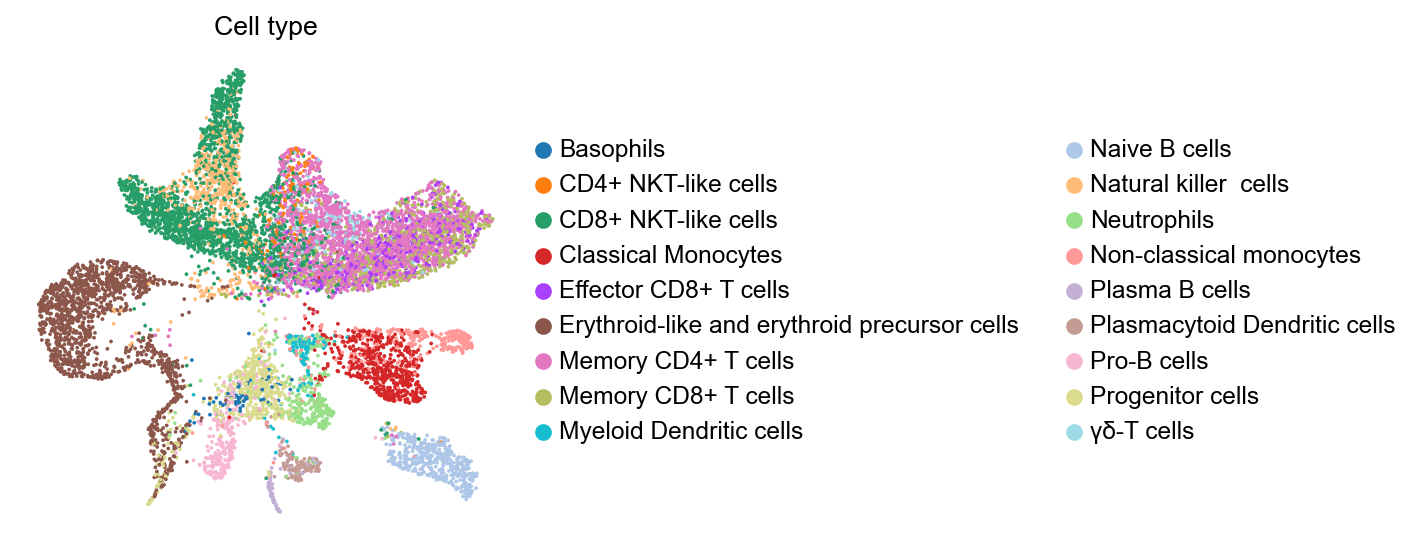

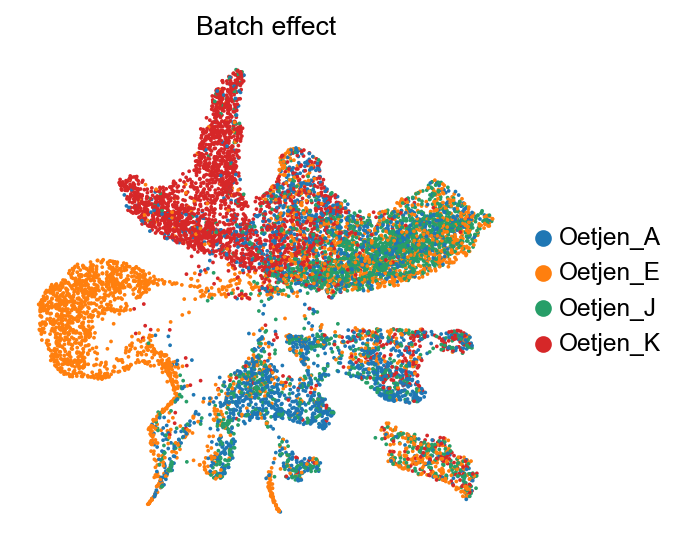

In [3]:
# 4 patiens for training
benchmark_env.in_house_model_tokenized_pathways_hvg_encoder(save_path='trained_models/Assess_generalisability/HVG_Encoder_Tokenized_Pathways/', train=True, save_figure=True)

Number of parameters: 8769406


c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\einops\_torch_specific.py:108: ImportWarning: allow_ops_in_compiled_graph failed to import torch: ensure pytorch >=2.0
  warnings.warn("allow_ops_in_compiled_graph failed to import torch: ensure pytorch >=2.0", ImportWarning)



Start Training



  5%|▌         | 1/20 [02:24<45:41, 144.29s/it]

Epoch 1 | Training loss: 0.1797 | Validation loss: 0.1809


 25%|██▌       | 5/20 [10:43<33:24, 133.65s/it]

Epoch 5 | Training loss: 0.0366 | Validation loss: 0.0262


 45%|████▌     | 9/20 [19:24<25:00, 136.37s/it]

Epoch 9 | Training loss: 0.0139 | Validation loss: 0.0120


 65%|██████▌   | 13/20 [27:49<15:37, 133.93s/it]

Epoch 13 | Training loss: 0.0126 | Validation loss: 0.0117


 85%|████████▌ | 17/20 [36:12<06:41, 133.80s/it]

Epoch 17 | Training loss: 0.0219 | Validation loss: 0.0207


100%|██████████| 20/20 [42:55<00:00, 128.75s/it]

Epoch 20 | Training loss: 0.0152 | Validation loss: 0.0126

**Finished training**

Training time: 42.92 minutes

Loss score: 0.0117

Total training time: 42.95 minutes



c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Isolated labels ASW...
Graph connectivity...


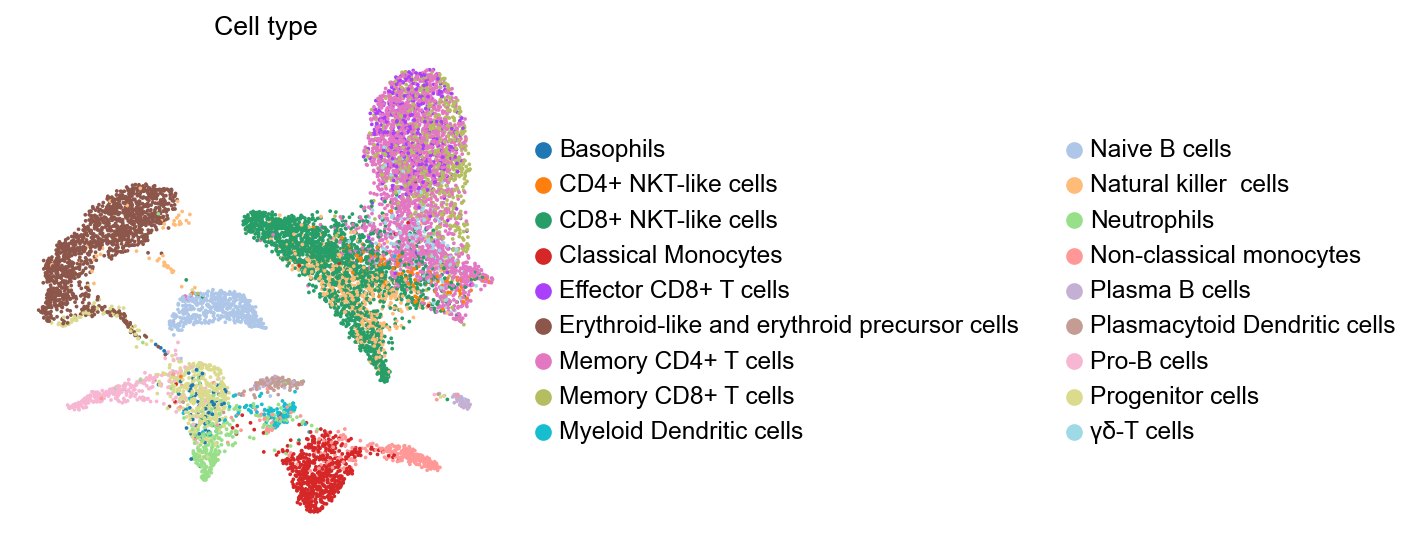

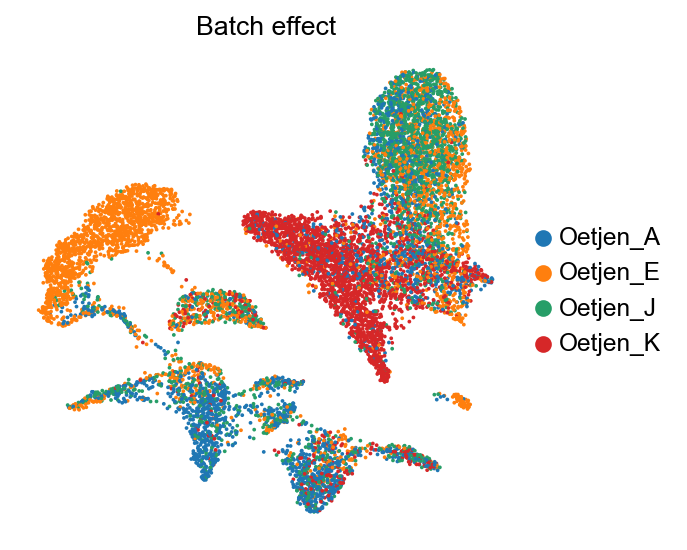

In [3]:
# 8 patiens for training
benchmark_env.in_house_model_tokenized_pathways_hvg_encoder(save_path='trained_models/Assess_generalisability/HVG_Encoder_Tokenized_Pathways/', train=True, save_figure=True)

Number of parameters: 8769406


c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\einops\_torch_specific.py:108: ImportWarning: allow_ops_in_compiled_graph failed to import torch: ensure pytorch >=2.0
  warnings.warn("allow_ops_in_compiled_graph failed to import torch: ensure pytorch >=2.0", ImportWarning)



Start Training



  5%|▌         | 1/20 [04:06<1:17:54, 246.05s/it]

Epoch 1 | Training loss: 0.1048 | Validation loss: 0.1013


 25%|██▌       | 5/20 [17:08<52:56, 211.76s/it]  

Epoch 5 | Training loss: 0.0200 | Validation loss: 0.0154


 45%|████▌     | 9/20 [30:10<38:08, 208.04s/it]

Epoch 9 | Training loss: 0.0126 | Validation loss: 0.0108


 65%|██████▌   | 13/20 [43:03<23:57, 205.37s/it]

Epoch 13 | Training loss: 0.0124 | Validation loss: 0.0125


 85%|████████▌ | 17/20 [56:09<10:23, 207.88s/it]

Epoch 17 | Training loss: 0.0129 | Validation loss: 0.0110


 95%|█████████▌| 19/20 [1:06:19<03:29, 209.42s/it]

Epoch 20 | Training loss: 0.0122 | Validation loss: 0.0138
Stopped training using EarlyStopping at epoch 20

**Finished training**

Training time: 66.32 minutes

Loss score: 0.0108

Total training time: 66.35 minutes



c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Isolated labels ASW...
Graph connectivity...


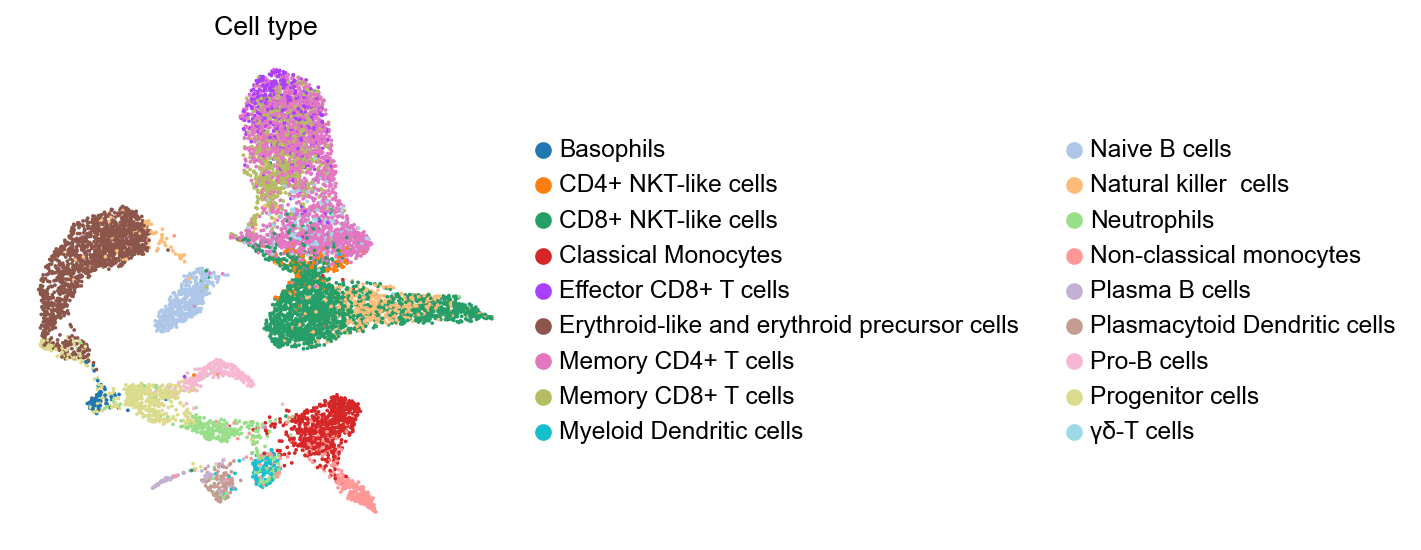

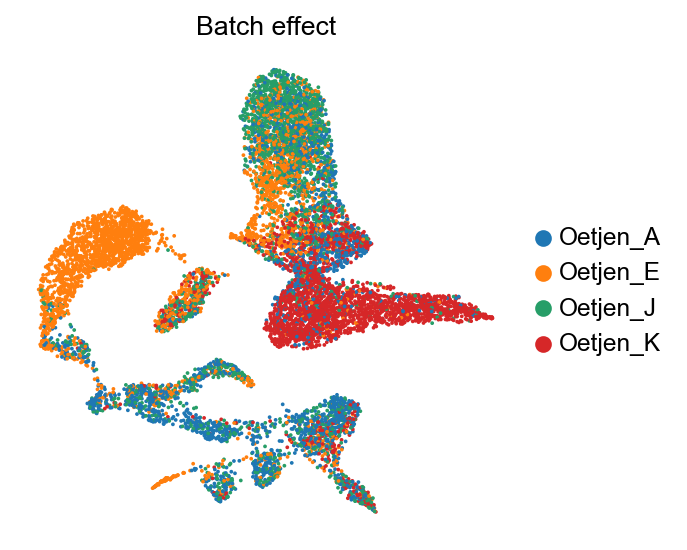

In [3]:
# 12 patiens for training
benchmark_env.in_house_model_tokenized_pathways_hvg_encoder(save_path='trained_models/Assess_generalisability/HVG_Encoder_Tokenized_Pathways/', train=True, save_figure=True)

Number of parameters: 8769406


c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\einops\_torch_specific.py:108: ImportWarning: allow_ops_in_compiled_graph failed to import torch: ensure pytorch >=2.0
  warnings.warn("allow_ops_in_compiled_graph failed to import torch: ensure pytorch >=2.0", ImportWarning)



Start Training



  5%|▌         | 1/20 [05:47<1:50:10, 347.90s/it]

Epoch 1 | Training loss: 0.0204 | Validation loss: 0.0217


 25%|██▌       | 5/20 [23:31<1:12:07, 288.48s/it]

Epoch 5 | Training loss: 0.0066 | Validation loss: 0.0057


 45%|████▌     | 9/20 [41:29<52:24, 285.89s/it]  

Epoch 9 | Training loss: 0.0062 | Validation loss: 0.0059


 65%|██████▌   | 13/20 [59:56<34:00, 291.50s/it]

Epoch 13 | Training loss: 0.0067 | Validation loss: 0.0061


 80%|████████  | 16/20 [1:18:09<19:32, 293.12s/it]

Epoch 17 | Training loss: 0.0067 | Validation loss: 0.0069
Stopped training using EarlyStopping at epoch 17

**Finished training**

Training time: 78.17 minutes

Loss score: 0.0057

Total training time: 78.21 minutes



c:\Users\user\Documents\GitHub\Masters_Thesis\MScEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NMI...
ARI...
Silhouette score...
PC regression...
cell cycle effect...
Isolated labels F1...
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Compute neighbors on rep In_house
Isolated labels ASW...
Graph connectivity...


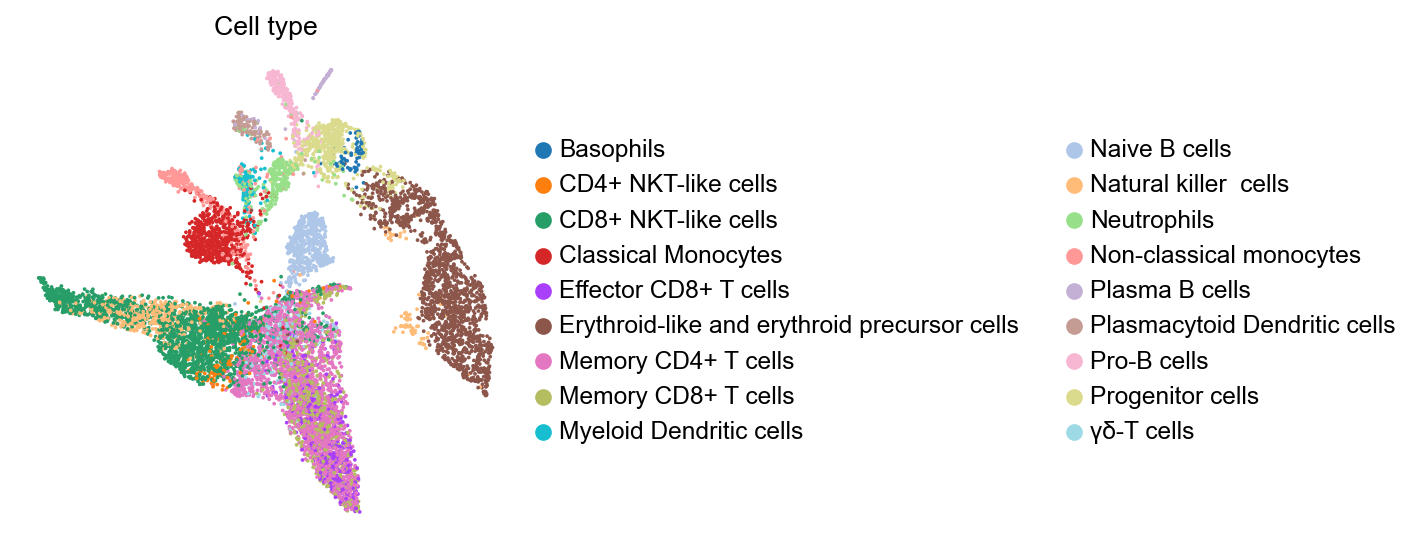

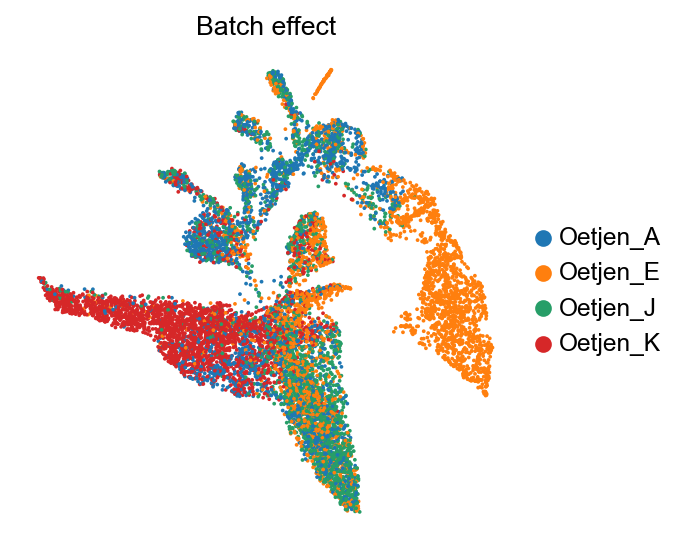

In [3]:
# 16 patiens for training
benchmark_env.in_house_model_tokenized_pathways_hvg_encoder(save_path='trained_models/Assess_generalisability/HVG_Encoder_Tokenized_Pathways/', train=True, save_figure=True)

#### Model implementing a transformer mechanism on tokenized HVGs + Gene2vec representations

In [ ]:
benchmark_env.in_house_model_tokenized_HVG_transformer(save_path='trained_models/Assess_generalisability/Tokenized_HVG_Transformer/', train=True, save_figure=True)

#### Model implementing a transformer mechanism on tokenized HVGs + Gene2vec representations + transformer mechanism on tokenized pathways/gene sets

In [ ]:
benchmark_env.in_house_model_tokenized_HVG_transformer_with_tokenized_pathways(save_path='trained_models/Assess_generalisability/Tokenized_HVG_Transformer_with_Pathways/', train=True, save_figure=True)

### Make dataframe and visualize

In [4]:
# Load csv dataframe if we want to merge old runs with the new one (saved in benchmark_env.metrics)
#New_loss_Benchmark_results, Benchmark_results
benchmark_env.read_csv(name="benchmarks/results/Bone_marrow/Benchmark_on_testdata_results")

In [5]:
benchmark_env.make_benchamrk_results_dataframe(min_max_normalize=False)

In [6]:
# 4 patiens for training
benchmark_env.visualize_results() 

,ASW_label,ASW_label/batch,PCR_batch,isolated_label_silhouette,graph_conn,NMI_cluster/label,ARI_cluster/label,cell_cycle_conservation,isolated_label_F1,Overall Batch,Overall Bio,Overall
PCA,0.545715,0.820356,0.000000,0.575158,0.945241,0.734265,0.485702,0.889120,0.580582,0.588532,0.635090,0.616467
In-house HVG Encoder with Tokenized Pathways Model,0.441426,0.788362,0.814106,0.538569,0.938785,0.659709,0.440864,0.200218,0.402516,0.847084,0.447217,0.607164
Unintegrated,0.497122,0.912051,0.000000,0.509778,0.828583,0.631147,0.463922,1.000000,0.368930,0.580211,0.578483,0.579174


In [6]:
# 8 patiens for training
benchmark_env.visualize_results() 

,ASW_label,ASW_label/batch,PCR_batch,isolated_label_silhouette,graph_conn,NMI_cluster/label,ARI_cluster/label,cell_cycle_conservation,isolated_label_F1,Overall Batch,Overall Bio,Overall
In-house HVG Encoder with Tokenized Pathways Model,0.514047,0.837974,0.618615,0.556927,0.933506,0.675841,0.506402,0.866391,0.385179,0.796698,0.584131,0.669158
PCA,0.545715,0.820356,0.000000,0.575158,0.945241,0.734265,0.485702,0.889120,0.580582,0.588532,0.635090,0.616467
Unintegrated,0.497122,0.912051,0.000000,0.509778,0.828583,0.631147,0.463922,1.000000,0.368930,0.580211,0.578483,0.579174


In [6]:
# 12 patiens for training
benchmark_env.visualize_results() 

,ASW_label,ASW_label/batch,PCR_batch,isolated_label_silhouette,graph_conn,NMI_cluster/label,ARI_cluster/label,cell_cycle_conservation,isolated_label_F1,Overall Batch,Overall Bio,Overall
In-house HVG Encoder with Tokenized Pathways Model,0.518927,0.806536,0.551831,0.609646,0.955733,0.699294,0.449413,0.743548,0.496272,0.771367,0.586183,0.660257
PCA,0.545715,0.820356,0.000000,0.575158,0.945241,0.734265,0.485702,0.889120,0.580582,0.588532,0.635090,0.616467
Unintegrated,0.497122,0.912051,0.000000,0.509778,0.828583,0.631147,0.463922,1.000000,0.368930,0.580211,0.578483,0.579174


In [6]:
# 16 patiens for training
benchmark_env.visualize_results() 

,ASW_label,ASW_label/batch,PCR_batch,isolated_label_silhouette,graph_conn,NMI_cluster/label,ARI_cluster/label,cell_cycle_conservation,isolated_label_F1,Overall Batch,Overall Bio,Overall
In-house HVG Encoder with Tokenized Pathways Model,0.466063,0.826474,0.701245,0.551566,0.950704,0.691051,0.532672,0.634915,0.445901,0.826141,0.553695,0.662673
PCA,0.545715,0.820356,0.000000,0.575158,0.945241,0.734265,0.485702,0.889120,0.580582,0.588532,0.635090,0.616467
Unintegrated,0.497122,0.912051,0.000000,0.509778,0.828583,0.631147,0.463922,1.000000,0.368930,0.580211,0.578483,0.579174


In [7]:
benchmark_env.save_results_as_csv(name="benchmarks/results/Bone_marrow/Benchmark_on_testdata_results")